## 전처리
## wav파일을 spectrogram으로 바꾸기

In [2]:
!pip install matplotlib

  Using cached matplotlib-3.2.1-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)


In [2]:
!pip install librosa
!pip install pydub

  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612890 sha256=fb82eaccad5f757767c1144b77720297f2ccffb34f06ed4e9376a6a7f06b7b1a
  Stored in directory: c:\users\prlab\appdata\local\pip\cache\wheels\18\9e\42\3224f85730f92fa2925f0b4fb6ef7f9c5431a64dfc77b95b39
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23095 sha256=cccd2f7cb2b449e47f135323378f741a75267b0363d016ba46af9229577976c2
  Stored in directory: c:\users\prlab\appdata\local\pip\cache\wheels\cd\85\04\704a589ef8773d1ec1393c4b271a023f929d85ef5317b12d8c
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320723 sha256=4b4273d8f1fb905872eb84a1552282f3185844ac22131e4df91c47a137d032f5
  Stored in directory: c:\users\prlab\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built librosa audioread resampy


In [2]:
import os
import librosa  
import scipy.signal as signal
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
from sklearn.preprocessing import MinMaxScaler


#1차 전처리-음성 2초단위로 자르기
def audio_cut(data,feeling,n):
    t1=0
    t2=2000
    Audio = AudioSegment.from_wav(data)
    for i in range (len(Audio)) :
        newAudio = Audio[t1:t2]
        filename='act_audio_cut/'+feeling+'/happy_'+str(n)+'_'+str(i)+'.wav'  #잘라진 음성 저장 경로
        newAudio.export(filename, format="wav")
        sftf_wav=stft_spec(filename,feeling,n,i)
        t1 = t1 + 100 #Works in milliseconds
        t2 = t2 + 100
        if t2>len(Audio) :
            break;
        print('스펙토그램 이미지 저장: ', str(n)+'_'+str(i))
            
#2차 전처리-stft spectrogram 만들기
def stft_spec(wav_file,feeling,n,i):
    audio_sample, sampling_rate = librosa.load(wav_file, sr = None)        
    fft_result = librosa.stft(audio_sample, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T                    
    mag, phase = librosa.magphase(fft_result)    
    scaler = MinMaxScaler()
    mag_n=scaler.fit_transform(mag)
    
    librosa.display.specshow(mag_n.T, y_axis='linear', x_axis='time', sr=sampling_rate)
    plt.ylim([200,6000])
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    plt.savefig('act_stft_spec/'+feeling+'/happy_'+str(n)+'_'+str(i)+'.png')  #스펙트럼 저장 경로
#     plt.show()

C:\Users\PRLAB\.conda\envs\tensorflow_hny\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\PRLAB\.conda\envs\tensorflow_hny\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\PRLAB\.conda\envs\tensorflow_hny\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Could

In [ ]:
#실행 코드
for j in range(0,20):
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/김건회(happy&neutral)/'+ str(j+1)+'.wav','kkh',j+1)
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/김동국(happy&neutral)/'+ str(j+1)+'.wav','kdk',j+1)
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/노재신(happy&neutral)/'+ str(j+1)+'.wav','njs',j+1)
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/송현수(happy&neutral)/'+ str(j+1)+'.wav','shs',j+1)
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/이지윤(happy&neutral)/'+ str(j+1)+'.wav','ljy',j+1)
    audio_cut('C:/Users/anna4/Code/final_project/연기자(happy&neutral)/이혜리(happy&neutral)/'+ str(j+1)+'.wav','lhl',j+1)
 

스펙토그램 이미지 저장:  1_0
스펙토그램 이미지 저장:  1_1
스펙토그램 이미지 저장:  1_2
스펙토그램 이미지 저장:  1_3
스펙토그램 이미지 저장:  1_4
스펙토그램 이미지 저장:  1_5
스펙토그램 이미지 저장:  1_6
스펙토그램 이미지 저장:  1_7
스펙토그램 이미지 저장:  1_8
스펙토그램 이미지 저장:  1_9
스펙토그램 이미지 저장:  1_10
스펙토그램 이미지 저장:  1_11
스펙토그램 이미지 저장:  1_12
스펙토그램 이미지 저장:  1_13
스펙토그램 이미지 저장:  1_14
스펙토그램 이미지 저장:  1_15
스펙토그램 이미지 저장:  1_16
스펙토그램 이미지 저장:  1_17
스펙토그램 이미지 저장:  1_18
스펙토그램 이미지 저장:  1_19
스펙토그램 이미지 저장:  1_20
스펙토그램 이미지 저장:  1_21
스펙토그램 이미지 저장:  1_22
스펙토그램 이미지 저장:  1_23
스펙토그램 이미지 저장:  1_24
스펙토그램 이미지 저장:  1_25
스펙토그램 이미지 저장:  1_26
스펙토그램 이미지 저장:  1_27
스펙토그램 이미지 저장:  1_28
스펙토그램 이미지 저장:  1_29
스펙토그램 이미지 저장:  1_30
스펙토그램 이미지 저장:  1_31
스펙토그램 이미지 저장:  1_32
스펙토그램 이미지 저장:  1_33
스펙토그램 이미지 저장:  1_34
스펙토그램 이미지 저장:  1_35
스펙토그램 이미지 저장:  1_36
스펙토그램 이미지 저장:  1_37
스펙토그램 이미지 저장:  1_38
스펙토그램 이미지 저장:  1_39
스펙토그램 이미지 저장:  1_40
스펙토그램 이미지 저장:  1_41
스펙토그램 이미지 저장:  1_42
스펙토그램 이미지 저장:  1_43
스펙토그램 이미지 저장:  1_44
스펙토그램 이미지 저장:  1_45
스펙토그램 이미지 저장:  1_46
스펙토그램 이미지 저장:  1_47
스펙토그램 이미지 저장:  1_48
스펙토그램 이미지 저장:  1_49
스펙토그램 이미지 

스펙토그램 이미지 저장:  6_63
스펙토그램 이미지 저장:  6_64
스펙토그램 이미지 저장:  6_65
스펙토그램 이미지 저장:  6_66
스펙토그램 이미지 저장:  6_67
스펙토그램 이미지 저장:  6_68
스펙토그램 이미지 저장:  6_69
스펙토그램 이미지 저장:  7_0
스펙토그램 이미지 저장:  7_1
스펙토그램 이미지 저장:  7_2
스펙토그램 이미지 저장:  7_3
스펙토그램 이미지 저장:  7_4
스펙토그램 이미지 저장:  7_5
스펙토그램 이미지 저장:  7_6
스펙토그램 이미지 저장:  7_7
스펙토그램 이미지 저장:  7_8
스펙토그램 이미지 저장:  7_9
스펙토그램 이미지 저장:  7_10
스펙토그램 이미지 저장:  7_11
스펙토그램 이미지 저장:  7_12
스펙토그램 이미지 저장:  7_13
스펙토그램 이미지 저장:  7_14
스펙토그램 이미지 저장:  7_15
스펙토그램 이미지 저장:  7_16
스펙토그램 이미지 저장:  7_17
스펙토그램 이미지 저장:  7_18
스펙토그램 이미지 저장:  7_19
스펙토그램 이미지 저장:  7_20
스펙토그램 이미지 저장:  7_21
스펙토그램 이미지 저장:  7_22
스펙토그램 이미지 저장:  7_23
스펙토그램 이미지 저장:  7_24
스펙토그램 이미지 저장:  7_25
스펙토그램 이미지 저장:  7_26
스펙토그램 이미지 저장:  7_27
스펙토그램 이미지 저장:  7_28
스펙토그램 이미지 저장:  7_29
스펙토그램 이미지 저장:  7_30
스펙토그램 이미지 저장:  7_31
스펙토그램 이미지 저장:  7_32
스펙토그램 이미지 저장:  7_33
스펙토그램 이미지 저장:  7_34
스펙토그램 이미지 저장:  7_35
스펙토그램 이미지 저장:  7_36
스펙토그램 이미지 저장:  7_37
스펙토그램 이미지 저장:  7_38
스펙토그램 이미지 저장:  7_39
스펙토그램 이미지 저장:  7_40
스펙토그램 이미지 저장:  7_41
스펙토그램 이미지 저장:  7_42
스펙토그램 이미지 

스펙토그램 이미지 저장:  11_91
스펙토그램 이미지 저장:  11_92
스펙토그램 이미지 저장:  11_93
스펙토그램 이미지 저장:  11_94
스펙토그램 이미지 저장:  11_95
스펙토그램 이미지 저장:  11_96
스펙토그램 이미지 저장:  11_97
스펙토그램 이미지 저장:  11_98
스펙토그램 이미지 저장:  11_99
스펙토그램 이미지 저장:  11_100
스펙토그램 이미지 저장:  11_101
스펙토그램 이미지 저장:  11_102
스펙토그램 이미지 저장:  11_103
스펙토그램 이미지 저장:  11_104
스펙토그램 이미지 저장:  11_105
스펙토그램 이미지 저장:  11_106
스펙토그램 이미지 저장:  11_107
스펙토그램 이미지 저장:  11_108
스펙토그램 이미지 저장:  11_109
스펙토그램 이미지 저장:  11_110
스펙토그램 이미지 저장:  11_111
스펙토그램 이미지 저장:  11_112
스펙토그램 이미지 저장:  11_113
스펙토그램 이미지 저장:  11_114
스펙토그램 이미지 저장:  11_115
스펙토그램 이미지 저장:  11_116
스펙토그램 이미지 저장:  11_117
스펙토그램 이미지 저장:  11_118
스펙토그램 이미지 저장:  11_119
스펙토그램 이미지 저장:  11_120
스펙토그램 이미지 저장:  11_121
스펙토그램 이미지 저장:  11_122
스펙토그램 이미지 저장:  11_123
스펙토그램 이미지 저장:  11_124
스펙토그램 이미지 저장:  11_125
스펙토그램 이미지 저장:  11_126
스펙토그램 이미지 저장:  11_127
스펙토그램 이미지 저장:  11_128
스펙토그램 이미지 저장:  11_129
스펙토그램 이미지 저장:  11_130
스펙토그램 이미지 저장:  11_131
스펙토그램 이미지 저장:  11_132
스펙토그램 이미지 저장:  11_133
스펙토그램 이미지 저장:  11_134
스펙토그램 이미지 저장:  11_135
스펙토그램 이미지 저장:  11_1

스펙토그램 이미지 저장:  15_3
스펙토그램 이미지 저장:  15_4
스펙토그램 이미지 저장:  15_5
스펙토그램 이미지 저장:  15_6
스펙토그램 이미지 저장:  15_7
스펙토그램 이미지 저장:  15_8
스펙토그램 이미지 저장:  15_9
스펙토그램 이미지 저장:  15_10
스펙토그램 이미지 저장:  15_11
스펙토그램 이미지 저장:  15_12
스펙토그램 이미지 저장:  15_13
스펙토그램 이미지 저장:  15_14
스펙토그램 이미지 저장:  15_15
스펙토그램 이미지 저장:  15_16
스펙토그램 이미지 저장:  15_17
스펙토그램 이미지 저장:  15_18
스펙토그램 이미지 저장:  15_19
스펙토그램 이미지 저장:  15_20
스펙토그램 이미지 저장:  15_21
스펙토그램 이미지 저장:  15_22
스펙토그램 이미지 저장:  15_23
스펙토그램 이미지 저장:  15_24
스펙토그램 이미지 저장:  15_25
스펙토그램 이미지 저장:  15_26
스펙토그램 이미지 저장:  15_27
스펙토그램 이미지 저장:  15_28
스펙토그램 이미지 저장:  15_29
스펙토그램 이미지 저장:  15_30
스펙토그램 이미지 저장:  15_31
스펙토그램 이미지 저장:  15_32
스펙토그램 이미지 저장:  15_33
스펙토그램 이미지 저장:  15_34
스펙토그램 이미지 저장:  15_35
스펙토그램 이미지 저장:  15_36
스펙토그램 이미지 저장:  15_37
스펙토그램 이미지 저장:  15_38
스펙토그램 이미지 저장:  15_39
스펙토그램 이미지 저장:  15_40
스펙토그램 이미지 저장:  15_41
스펙토그램 이미지 저장:  15_42
스펙토그램 이미지 저장:  15_43
스펙토그램 이미지 저장:  15_44
스펙토그램 이미지 저장:  15_45
스펙토그램 이미지 저장:  15_46
스펙토그램 이미지 저장:  15_47
스펙토그램 이미지 저장:  15_48
스펙토그램 이미지 저장:  15_49
스펙토그램 이미지 저장:  15_50

스펙토그램 이미지 저장:  19_78
스펙토그램 이미지 저장:  19_79
스펙토그램 이미지 저장:  19_80
스펙토그램 이미지 저장:  19_81
스펙토그램 이미지 저장:  19_82
스펙토그램 이미지 저장:  19_83
스펙토그램 이미지 저장:  19_84
스펙토그램 이미지 저장:  19_85
스펙토그램 이미지 저장:  19_86
스펙토그램 이미지 저장:  19_87
스펙토그램 이미지 저장:  19_88
스펙토그램 이미지 저장:  19_89
스펙토그램 이미지 저장:  19_90
스펙토그램 이미지 저장:  19_91
스펙토그램 이미지 저장:  19_92
스펙토그램 이미지 저장:  19_93
스펙토그램 이미지 저장:  19_94
스펙토그램 이미지 저장:  19_95
스펙토그램 이미지 저장:  19_96
스펙토그램 이미지 저장:  19_97
스펙토그램 이미지 저장:  19_98
스펙토그램 이미지 저장:  19_99
스펙토그램 이미지 저장:  19_100
스펙토그램 이미지 저장:  19_101
스펙토그램 이미지 저장:  19_102
스펙토그램 이미지 저장:  19_103
스펙토그램 이미지 저장:  19_104
스펙토그램 이미지 저장:  19_105
스펙토그램 이미지 저장:  19_106
스펙토그램 이미지 저장:  19_107
스펙토그램 이미지 저장:  19_108
스펙토그램 이미지 저장:  19_109
스펙토그램 이미지 저장:  19_110
스펙토그램 이미지 저장:  19_111
스펙토그램 이미지 저장:  19_112
스펙토그램 이미지 저장:  19_113
스펙토그램 이미지 저장:  19_114
스펙토그램 이미지 저장:  19_115
스펙토그램 이미지 저장:  19_116
스펙토그램 이미지 저장:  19_117
스펙토그램 이미지 저장:  19_118
스펙토그램 이미지 저장:  19_119
스펙토그램 이미지 저장:  19_120
스펙토그램 이미지 저장:  19_121
스펙토그램 이미지 저장:  19_122
스펙토그램 이미지 저장:  19_123
스펙토그램 이미지 

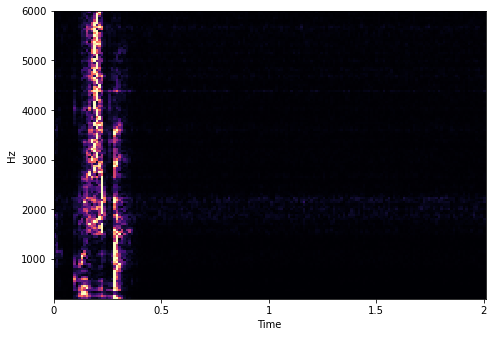

In [5]:
# 중간에 끊겨서 마지막 폴더만 다시 실행

for j in range(0, 20):
    audio_cut('C:/Users/PRLAB/final_project_hny/연기자(happy&neutral)/김건회(happy&neutral)/'+ str(j+1)+'.wav','kkh',j+1)

스펙토그램 이미지 저장:  16_0
스펙토그램 이미지 저장:  16_1
스펙토그램 이미지 저장:  16_2
스펙토그램 이미지 저장:  16_3
스펙토그램 이미지 저장:  16_4
스펙토그램 이미지 저장:  16_5
스펙토그램 이미지 저장:  16_6
스펙토그램 이미지 저장:  16_7
스펙토그램 이미지 저장:  16_8
스펙토그램 이미지 저장:  16_9
스펙토그램 이미지 저장:  16_10
스펙토그램 이미지 저장:  16_11
스펙토그램 이미지 저장:  16_12
스펙토그램 이미지 저장:  16_13
스펙토그램 이미지 저장:  16_14
스펙토그램 이미지 저장:  16_15
스펙토그램 이미지 저장:  16_16
스펙토그램 이미지 저장:  16_17
스펙토그램 이미지 저장:  16_18
스펙토그램 이미지 저장:  16_19
스펙토그램 이미지 저장:  16_20
스펙토그램 이미지 저장:  16_21
스펙토그램 이미지 저장:  16_22
스펙토그램 이미지 저장:  16_23
스펙토그램 이미지 저장:  16_24
스펙토그램 이미지 저장:  16_25
스펙토그램 이미지 저장:  16_26
스펙토그램 이미지 저장:  16_27
스펙토그램 이미지 저장:  16_28
스펙토그램 이미지 저장:  16_29
스펙토그램 이미지 저장:  16_30
스펙토그램 이미지 저장:  16_31
스펙토그램 이미지 저장:  16_32
스펙토그램 이미지 저장:  16_33
스펙토그램 이미지 저장:  16_34
스펙토그램 이미지 저장:  16_35
스펙토그램 이미지 저장:  16_36
스펙토그램 이미지 저장:  16_37
스펙토그램 이미지 저장:  16_38
스펙토그램 이미지 저장:  16_39
스펙토그램 이미지 저장:  16_40
스펙토그램 이미지 저장:  16_41
스펙토그램 이미지 저장:  16_42
스펙토그램 이미지 저장:  16_43
스펙토그램 이미지 저장:  16_44
스펙토그램 이미지 저장:  16_45
스펙토그램 이미지 저장:  16_46
스펙토그램 이미지 저장:  16_47
스펙

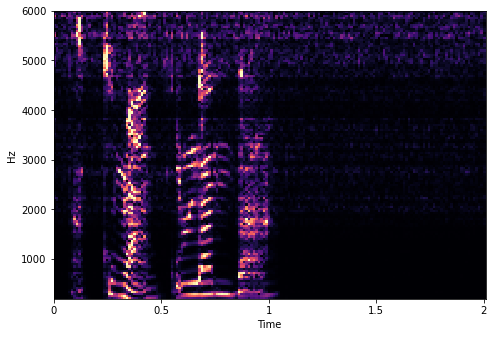

In [3]:
# 중간에 끊겨서 마지막 폴더만 다시 실행

for j in range(15, 20):
    audio_cut('C:/Users/PRLAB/final_project_hny/연기자(happy&neutral)/이혜리(happy&neutral)/'+ str(j+1)+'.wav','lhl',j+1)